In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mon_data.csv')
df.head()

,filename,url,description,type,filepath,scraped,old_filename,old_filepath,text_image
0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,0,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,FACTURE\n\nLOGO\n\nJoanna Binet\n48 Coubertin\...
1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,0,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,Joanna Binet\n48 Coubertin\n31400 Paris\n\nFAC...
2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,0,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,FACTURE\n\nMon entreprise : Nom de la société\...
3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,0,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,Joanna Binet\n48 Coubertin\n31400 Paris\n\nFAC...
4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,0,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,Payer en ligne >\nFACTURE No\n\nSFIDELI\n\nF/0...


In [3]:
data=df.iloc[:,[-1,3]]


In [5]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download()
 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import stopwords


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize.regexp import  RegexpTokenizer
stop_words = set(stopwords.words('french'))
stop_words.update(["." , ",",':'])
tokenizer=RegexpTokenizer(("[a-zA-Zé]{4,}"))
def stop_words_filtering(liste):
    liste_new=[]
    for i in liste:
        if i not in stop_words:
            liste_new.append(i)
        else:
            continue 
    return liste_new

dic_catig={}
for i in range(data.type.max()+1):
    dic_catig[i]=[]

for i,txt in enumerate(data.text_image):
    mots=stop_words_filtering(tokenizer.tokenize(str(txt).lower()))
    dic_catig[data.type[i]].extend(mots)
   

In [27]:
list_count=[]
for i in np.unique(dic_catig[0]):
    list_count.append(dic_catig[0].count(i))
data_counts=pd.DataFrame(np.unique(dic_catig[0]))
data_counts["counts"]=list_count
data_counts=data_counts.sort_values(by ='counts',ascending = False)
v=list(data_counts[0][:6])
v

['facture', 'total', 'montant', 'date', 'paiement', 'adresse']

C:\Users\sadoun\AppData\Local\Temp\ipykernel_12588\272752600.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


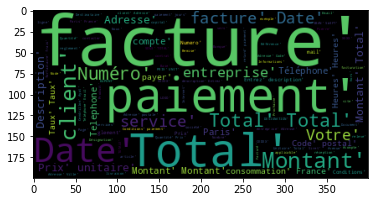

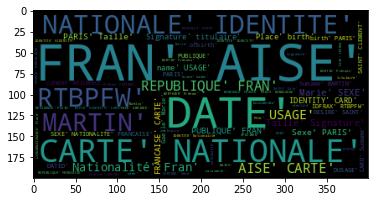

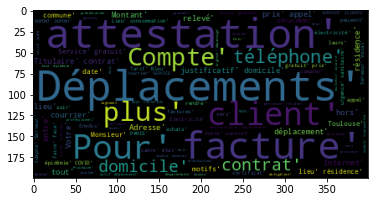

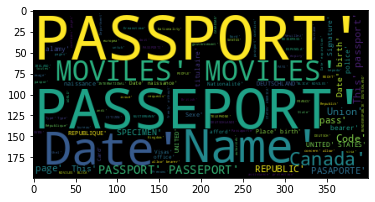

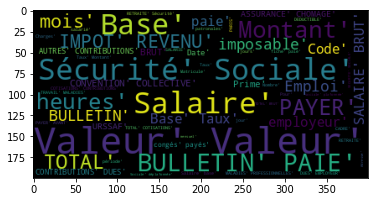

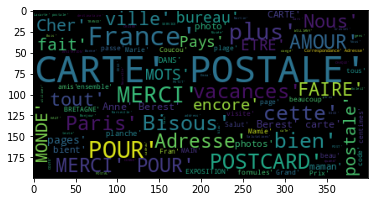

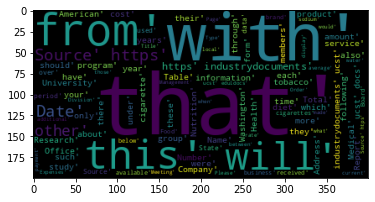

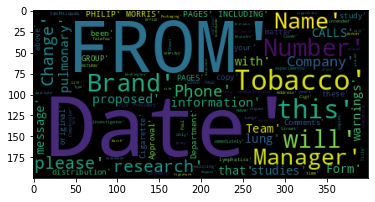

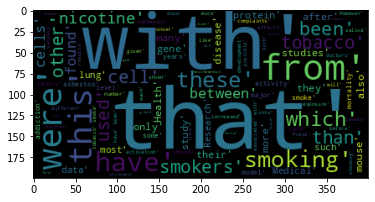

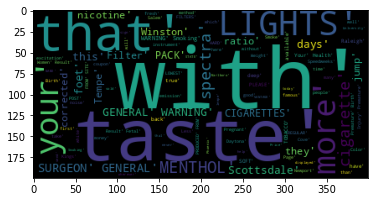

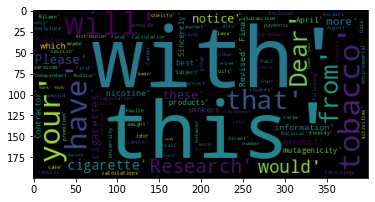

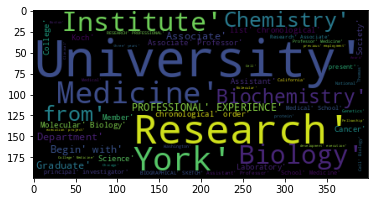

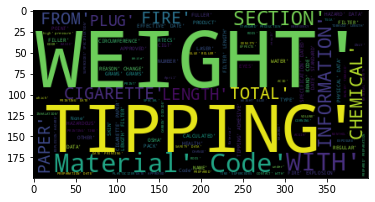

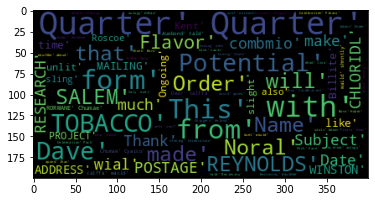

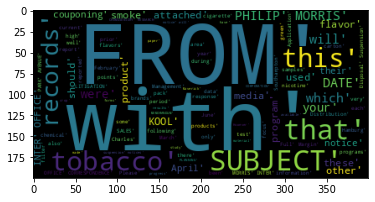

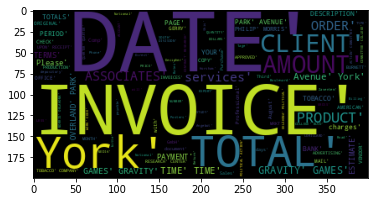

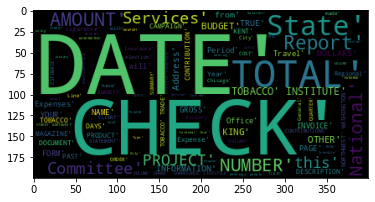

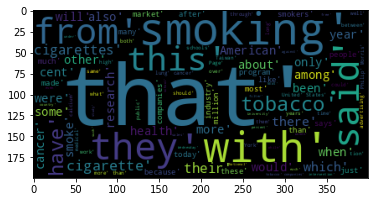

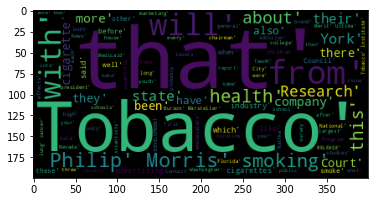

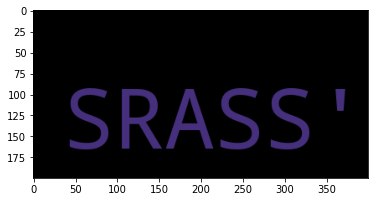

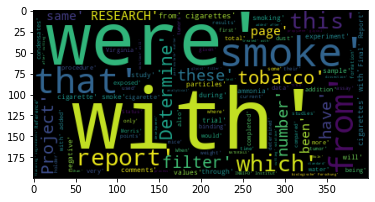

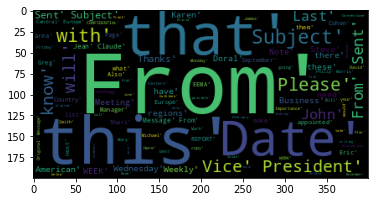

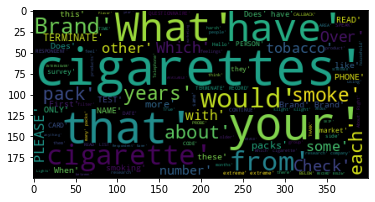

In [13]:
from  wordcloud import  WordCloud
wc= WordCloud(background_color = 'black', stopwords=stop_words, max_words =100,max_font_size=100, random_state=42)

for i in range(23):
    wc.generate(str(dic_catig[i]))
    fig=plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax2.imshow(wc)
    
    
    